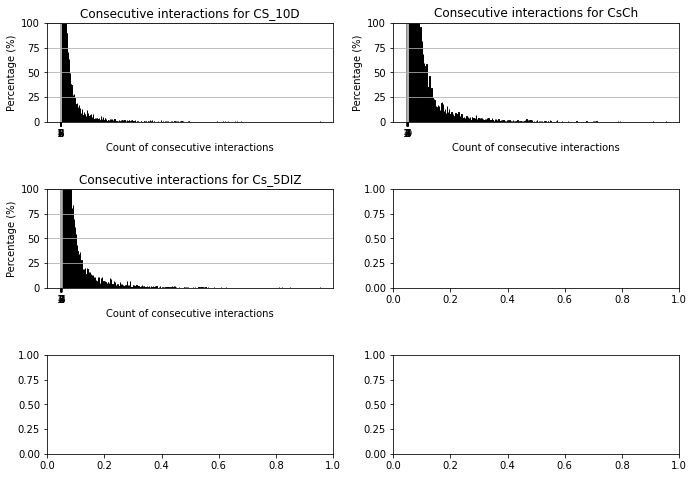

In [1]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import toml

from src import settings
from src.utils import fileio

TREATMENTS = ["CS_10D", "CsCh", "Cs_5DIZ"]

CONFIG_PATH = os.path.join(settings.CONFIG_DIR, "main.toml")
with open(CONFIG_PATH, "r") as file:
    config = toml.load(file)

fig, axes = plt.subplots(3, 2, figsize=(10, 7))
axes = axes.flatten()

for i, TREATMENT in enumerate(TREATMENTS):
    INPUT_DIR = os.path.join(settings.OUTPUT_DIR, "1_0_find_interactions", TREATMENT)
    # SCRIPT_OUTPUT = os.path.join(settings.OUTPUT_DIR, "PATH/TO/SAVE/FILE", TREATMENT)
    # os.makedirs(SCRIPT_OUTPUT, exist_ok=True)

    treatment = fileio.load_files_from_folder(INPUT_DIR)
    count_of_consecutive = []
    time_diff = []
    for group_name, group_path in treatment.items():
        df = pd.read_csv(group_path, index_col=0)
        df = df.sort_values("start_of_interaction")
        df.drop(columns=["distance", "angle"], inplace=True)
        df = df.reset_index(drop=True)

        for c in list(df.node_1.unique()):
            df_filter = df[(df["node_1"] == c) | (df["node_2"] == c)]

            first = df_filter.iloc[:-1].loc[:, ["node_1", "node_2", "start_of_interaction"]]
            second = df_filter.iloc[1:].loc[:, ["node_1", "node_2", "start_of_interaction"]]

            counter = 1
            counters = []
            for first_row, second_row in zip(first.iterrows(), second.iterrows()):
                idx, first_row_values = first_row
                idx, second_row_values = second_row

                if set([first_row_values["node_1"], first_row_values["node_2"]]) == set(
                    [second_row_values["node_1"], second_row_values["node_2"]]
                ):
                    diff = second_row_values["start_of_interaction"] - first_row_values["start_of_interaction"]
                    time_diff.append(diff)
                    counter += 1
                else:
                    counters.append(counter)
                    counter = 1
            count_of_consecutive.extend(counters)

    # count_of_consecutive = np.array(count_of_consecutive)
    # count_of_consecutive = count_of_consecutive[count_of_consecutive <= 11]
    # counts, bins = np.histogram(count_of_consecutive, bins=count_of_consecutive.max())
    # normalized_counts = (counts / float(np.sum(counts))) * 100

    # ax = axes[i]
    # bin_width = 0.85 * (bins[1] - bins[0])
    # ax.set_ylim(0, 100)
    # ax.bar(bins[:-1], normalized_counts, width=bin_width, edgecolor="black")
    # ax.set_title(f"Consecutive interactions for {TREATMENT}")
    # ax.set_xlabel("Count of consecutive interactions")
    # ax.set_ylabel("Percentage (%)")
    # bin_centers = np.arange(1, 10)  # - bin_width / 2
    # ax.set_xticks(bin_centers)
    # ax.set_xticklabels(range(1, 10))
    # ax.grid(True)

    time_diff = np.array(time_diff)
    counts, bins = np.histogram(time_diff, bins=time_diff.max())
    normalized_counts = (counts / float(np.sum(counts))) * 100

    ax = axes[i]
    bin_width = 0.85 * (bins[1] - bins[0])
    ax.set_ylim(0, 100)
    ax.bar(bins[:-1], counts, width=bin_width, edgecolor="black")
    ax.set_title(f"Consecutive interactions for {TREATMENT}")
    ax.set_xlabel("Count of consecutive interactions")
    ax.set_ylabel("Percentage (%)")
    bin_centers = np.arange(1, 10)  # - bin_width / 2
    ax.set_xticks(bin_centers)
    ax.set_xticklabels(range(1, 10))
    ax.grid(True)

plt.tight_layout(pad=2.0, w_pad=2.0, h_pad=2.0)
plt.show()

In [5]:
time_diff

array([ 40,  16, 117, ...,   0,  34,  19])